In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
citydata = "data/city_data.csv"
ridedata = "data/ride_data.csv"

In [3]:
# Read the City and Ride Data
citydf = pd.read_csv(citydata)
#citydf1= citydf.drop(columns='city')
ridedf = pd.read_csv(ridedata)

In [4]:
# Combine the data into a single dataset
df = pd.merge(ridedf, citydf, how="outer", on =["city"])
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

Text(0.5, 1.0, 'Pyber Ride Sharing Data: Urban (2018)')

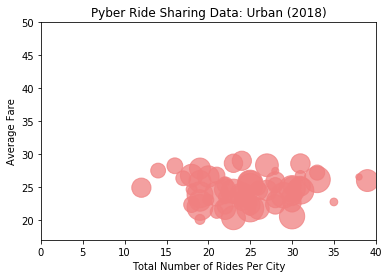

In [63]:
#urban bubble plot
urban = (df.loc[df['type']=="Urban",['city', 'ride_id', 'fare', 'driver_count']])
x = urban.groupby('city')['ride_id'].count()
y = urban.groupby('city')['fare'].mean()
drivercount =urban.groupby('city')['driver_count'].mean()
#urban, ax = plt.subplots()
plt.scatter(x, y, marker="o", facecolors="lightcoral", edgecolors="lightcoral",
            s=drivercount*10, alpha=0.75)
plt.xlim(0,40)
plt.ylim(17,50)
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data: Urban (2018)')

Text(0.5, 1.0, 'Pyber Ride Sharing Data: Rural (2018)')

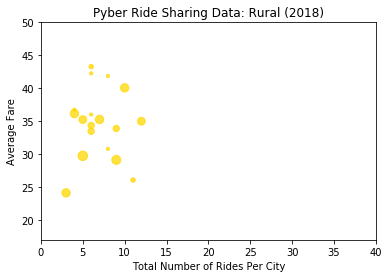

In [55]:
#rural bubble plot
rural = (df.loc[df['type']=="Rural",['city', 'ride_id', 'fare', 'driver_count']])
x = rural.groupby('city')['ride_id'].count()
y = rural.groupby('city')['fare'].mean()
drivercount =rural.groupby('city')['driver_count'].mean()
#urban, ax = plt.subplots()
plt.scatter(x, y, marker="o", facecolors="gold", edgecolors="gold",
            s=drivercount*10, alpha=0.75)
plt.xlim(0,40)
plt.ylim(17,50)
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data: Rural (2018)')

Text(0.5, 1.0, 'Pyber Ride Sharing Data: Suburban (2018)')

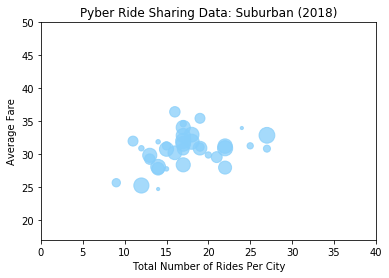

In [51]:
#suburban bubble plot
suburban = (df.loc[df['type']=="Suburban",['city', 'ride_id', 'fare', 'driver_count']])
x = suburban.groupby('city')['ride_id'].count()
y = suburban.groupby('city')['fare'].mean()
drivercount =suburban.groupby('city')['driver_count'].mean()
#urban, ax = plt.subplots()
plt.scatter(x, y, marker="o", facecolors="lightskyblue", edgecolors="lightskyblue",
            s=drivercount*10, alpha=0.75)
plt.xlim(0,40)
plt.ylim(17,50)
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data: Suburban (2018)')

In [47]:
plt = subplot(111)


x = range(40)
y = range(17,50)
fig = plt.figure()
ax1 = fig.add_subplot(111)

#ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
#ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')

ax1.scatter(x, y, marker="o", facecolors="blue", edgecolors="blue",
            s=drivercount*10, alpha=0.75)
ax1.scatter(x, y, marker="o", facecolors="orange", edgecolors="orange",
            s=drivercount*10, alpha=0.75)
ax1.scatter(x, y, marker="o", facecolors="red", edgecolors="red",
            s=drivercount*10, alpha=0.75)


plt.legend(loc='upper left');
plt.show()

NameError: name 'subplot' is not defined

## Total Fares by City Type

In [7]:
df = pd.merge(ridedf, citydf, how="outer", on =["city"])
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [8]:
faredf = df.groupby(['type'])['fare'].sum()
faredf

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

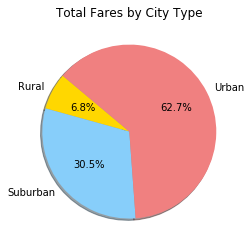

In [60]:
labels = ["Rural", "Suburban", "Urban"]
sizes = [faredf]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0)
plt.pie(faredf, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Total Fares by City Type')
plt.show()

## Total Rides by City Type

In [10]:
df = pd.merge(ridedf, citydf, how="outer", on =["city"])
df.head()
ridedf = df.groupby(['type'])['ride_id'].count()
ridedf

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

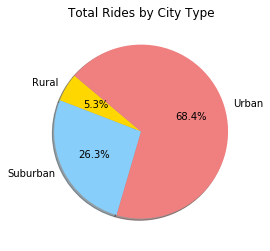

In [61]:
labels = ["Rural", "Suburban", "Urban"]
sizes = [ridedf]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0)
plt.pie(ridedf, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Total Rides by City Type')
plt.show()

## Total Drivers by City Type

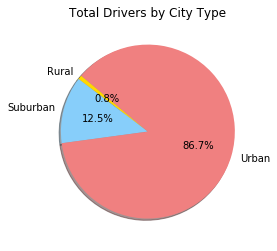

In [62]:
driverdf = df.groupby(['type'])['driver_count'].sum()
driverdf
labels = ["Rural", "Suburban", "Urban"]
sizes = [driverdf]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0)
plt.pie(driverdf, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Total Drivers by City Type')
plt.show()